# Module 7 Exercises

In this exercise, you will **analyze networks and visualize the results**. 


Let's start with analyzing the **traffic between airports**.

In [1]:
library(dplyr)
library(sp)
library(geosphere)
library(igraph)
library(networkD3)

# flight destinations and counts 
flights <- read.csv("/dsa/data/all_datasets/spatial/flights.csv", as.is=TRUE, header=TRUE)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘igraph’

The following objects are masked from ‘package:dplyr’:

    as_data_frame, groups, union

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



**Exercise 1:** **Create a data frame** that only has `airport1`, `airport2`, and the `cnt` attributes.

In [2]:
df <- flights[, c("airport1", "airport2", "cnt")]

head(df)

airport1,airport2,cnt
<chr>,<chr>,<int>
DFW,SJU,120
MSP,DFW,326
LGA,ORD,860
TPA,JFK,56
STT,BOS,44
PHX,DFW,550


airport1,airport2,cnt
<chr>,<chr>,<int>
DFW,SJU,120
MSP,DFW,326
LGA,ORD,860
TPA,JFK,56
STT,BOS,44
PHX,DFW,550
ORD,LAX,496
DCA,STL,200
ORD,SEA,214


**Exercise 2:** **Create a graph from this data frame**, use directed=FALSE to make it an **undirected** graph. 

In [20]:
#install.packages("DiagrammeR")
#library(DiagrammeR)

# edges <- c(df$airport1, df$airport2)

# g <- plot(df)

# dfMatrix <- as.matrix(df)

# g <- graph.edgelist(dfMatrix, directed = FALSE)

g <- graph.data.frame(df)

**Exercise 3:** Plot the network with igraph's `plot` function with a **force-directed layout**. 

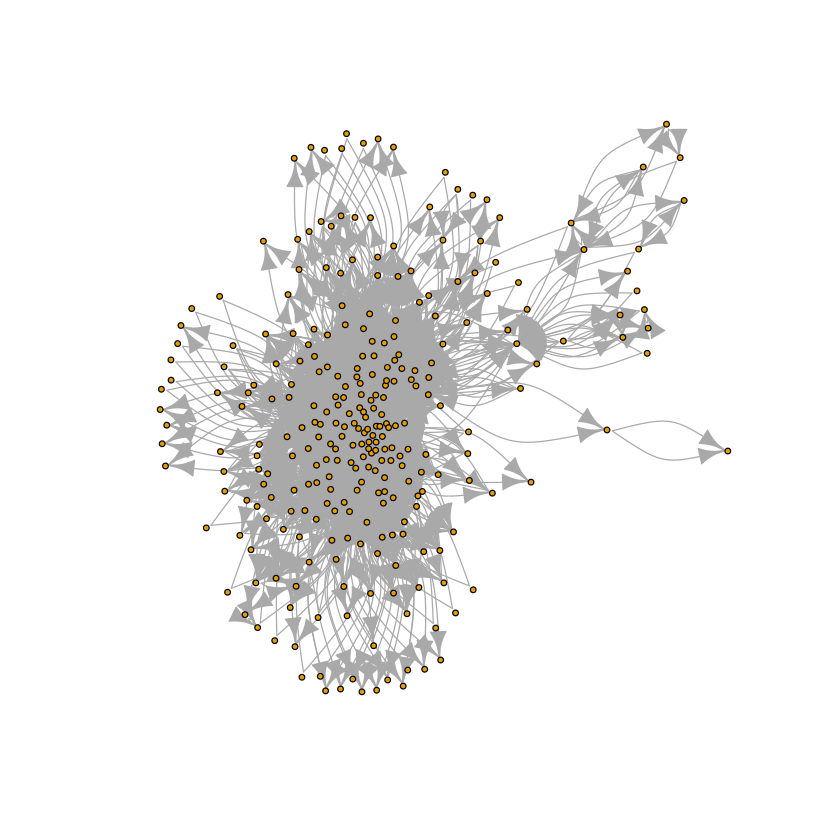

In [21]:
# do a force-directed layout 
layout1 <- layout.fruchterman.reingold(g)

# Let's plot this network without labels
# use vertex.size=2 and vertex.label=NA

plot(g, layout = layout1, vertex.size = 2, vertex.label = NA)

Now, we will **reduce multiple edges** between vertices by adding all their attributes. There are multiple airlines operating between two airports, **we add their flight counts.**

In [22]:
# add the flight counts by using "sum"
gs <- simplify(g, edge.attr.comb="sum")

# NORMALIZE the edge weight 
E(gs)$cnt <- E(gs)$cnt/max(E(gs)$cnt)

**Exercise 4:** Plot again, this time, **assign the edge weights to `edge.width` parameter.**

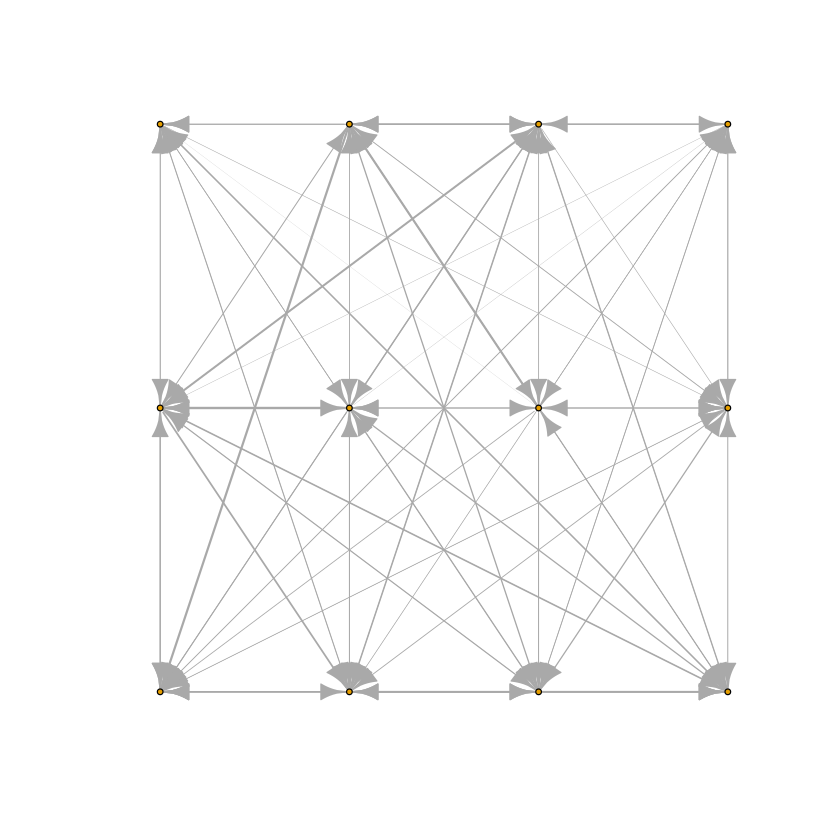

In [54]:
# do a force-directed layout 
layout1 <- layout_on_grid

# draw the network 
plot(gs, layout = layout1, vertex.size = 2, vertex.label = NA, edge.width = E(gs)$cnt*2) # do not forget edge.width=E(gs)$cnt

Now we can see the traffic weighted by the flight counts. Let's change the **size of the vertices by using the traffic**. 


We need to **sum up the weights of all the edges for each vertex**.

In [24]:
# Summing up the edge weights of the adjacent edges for each vertex.
V(gs)$traffic <- strength(gs, mode="all", weights = E(gs)$cnt)


# normalize
V(gs)$traffic <- V(gs)$traffic/max(V(gs)$traffic)

**Exercise 5:** Plot again, this time, **assign the `V(gs)$traffic` to the `vertex.size`. Make sure to multiply it by a value to make the graph look nice.** 

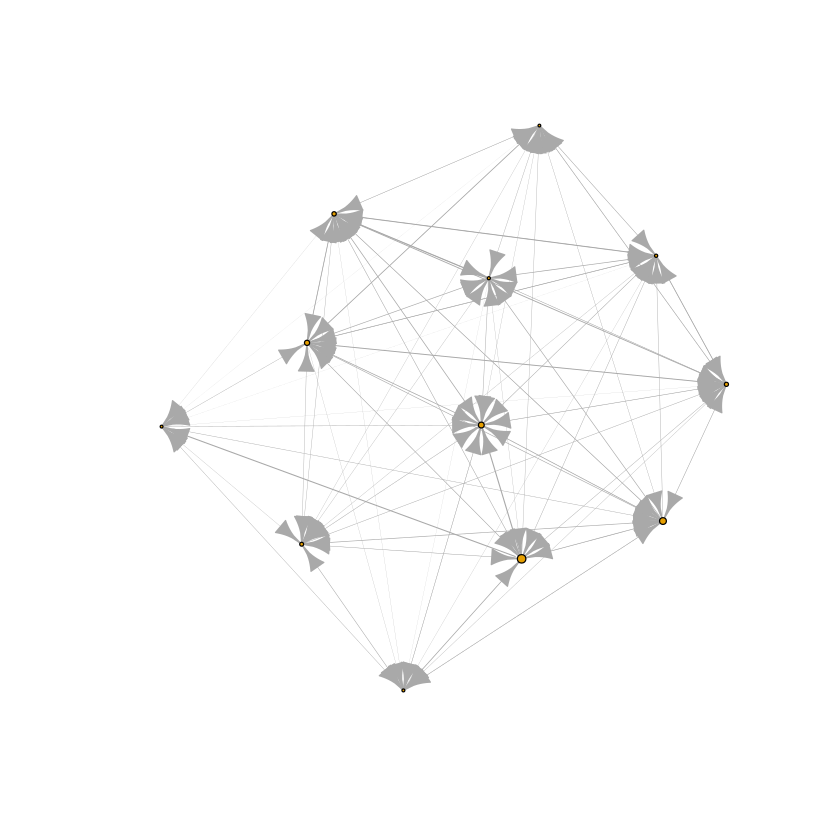

In [66]:
layout1 <- layout_nicely(gs)

plot(gs, layout = layout1,  vertex.size = V(gs)$traffic * 3, vertex.label = NA, edge.width = E(gs)$cnt)

Now we can see that some airports are busier than others, but we don't know their **names**. Let's find out by **removing the vertex shape** and **leaving the vertex label** and use a **font size proportional to the traffic**.


**Exercise 6:** Plot again, this time: `vertex.shape="none"` and `vertex.label.cex` should be **proportional to traffic.**

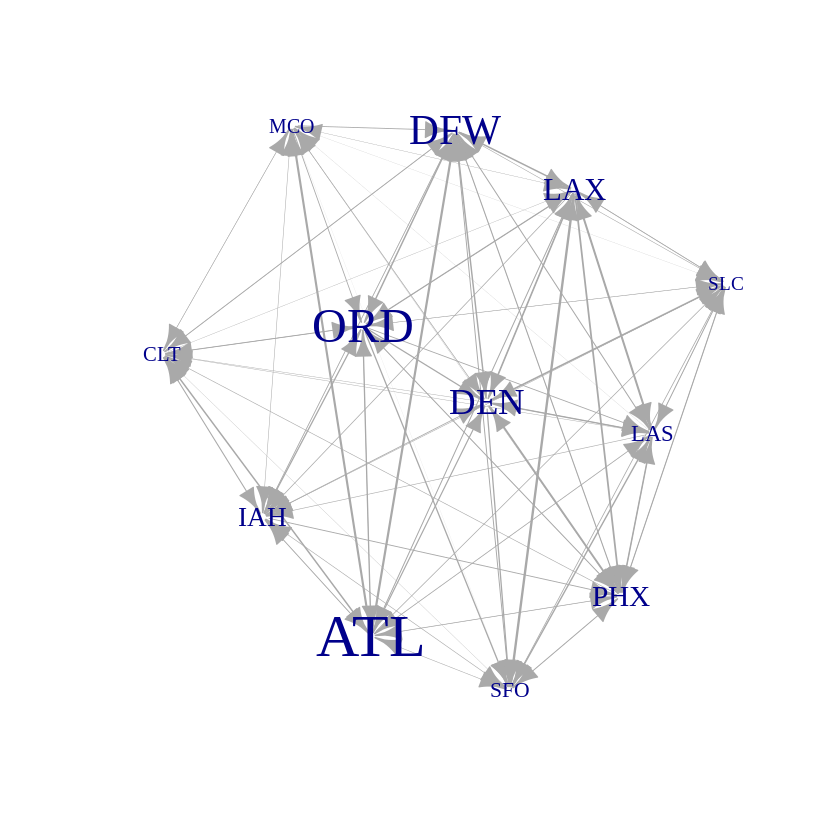

In [83]:
layout1 <- layout_nicely(gs)
#layout2 <- layout_on_sphere(gs)

plot(gs, layout = layout1, vertex.shape = "none", vertex.size = 3, 
     vertex.label.cex = V(gs)$traffic * 3, edge.width = E(gs)$cnt * 2)

#plot(gs, layout = layout2, vertex.shape = "none", vertex.label.cex = V(gs)$traffic * 2, edge.width = E(gs)$cnt * 2)

Let's **get rid of vertices** that do not have much traffic.

In [82]:
# find them 
dv <- V(gs)$traffic < 0.3

#delete them 
gs <- delete_vertices(gs, V(gs)[dv])

**Exercise 7:** Plot again, this time use a **vertex size and label font proportional to traffic** and make sure to make it look nice. 

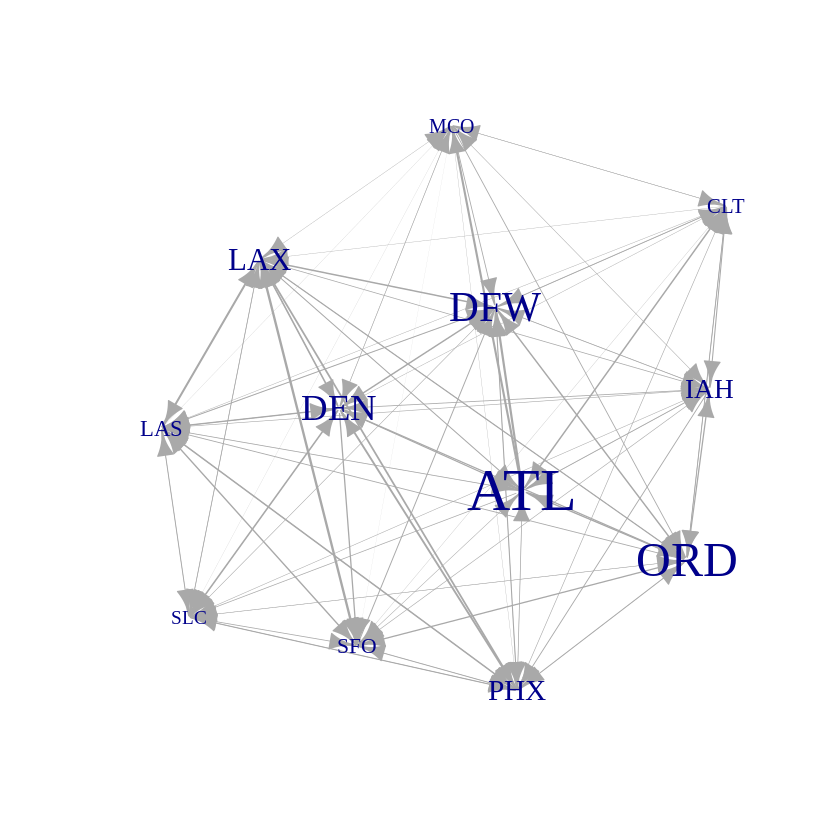

In [87]:
layout1 <- layout_nicely(gs)
plot(gs, layout = layout1, vertex.shape = "none", vertex.size = V(gs)$traffic * 3, vertex.label.cex = V(gs)$traffic * 3, 
     vertex.label.font = V(gs)$traffic, edge.width = E(gs)$cnt * 2)

# do not forget vertex.label.cex, vertex.size and edge.width